In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('traffic_data.csv')
df.head(3)

,step,state,bytes_transmitted
0,0,0,0
1,1,0,0
2,2,1,1279262


state
0    0.42
1    0.31
2    0.27
Name: proportion, dtype: float64
   state  proportion
0      0        0.42
1      1        0.31
2      2        0.27


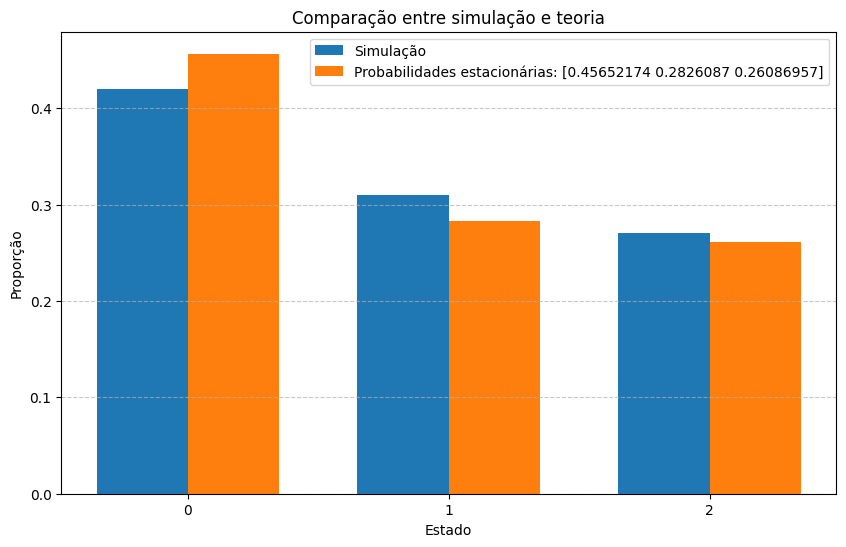

In [10]:
# Conta quantas vezes cada estado aparece
state_counts = df['state'].value_counts(normalize=True).sort_index()

# Exibe a proporção de tempo em cada estado
print(state_counts)

# Se preferir como DataFrame:
proportions_df = state_counts.reset_index()
proportions_df.columns = ['state', 'proportion']
print(proportions_df)

# Valores teóricos das probabilidades estacionárias
theoretical_probs = [0.45652174, 0.2826087, 0.26086957]
theoretical_df = pd.DataFrame({
    'state': [0, 1, 2],
    'theoretical_proportion': theoretical_probs
})

# Merge dos dados empíricos com os teóricos
comparison_df = pd.merge(proportions_df, theoretical_df, on='state')

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(comparison_df))

plt.bar([i - bar_width/2 for i in index], comparison_df['proportion'], 
        bar_width, label='Simulação')
plt.bar([i + bar_width/2 for i in index], comparison_df['theoretical_proportion'], 
        bar_width, label='Probabilidades estacionárias: [0.45652174 0.2826087 0.26086957]')

plt.xlabel('Estado')
plt.ylabel('Proporção')
plt.title('Comparação entre simulação e teoria')
plt.xticks(index, comparison_df['state'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
# Soma total dos bytes transmitidos
total_bytes = df["bytes_transmitted"].sum()

# Como cada passo dura 1 segundo, o tempo total é o número de linhas
total_seconds = len(df)

# Calcula a vazão média prática em Mbps
average_throughput_practical = (total_bytes * 8) / (total_seconds * 1_000_000)  # bits → megabits

print(f"Vazão prática: {average_throughput_practical:.2f} Mbps")

Vazão prática: 16.69 Mbps


Vazão média teórica: 15.87Mbps